# Autompg Regression Modelling

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pickle

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.22.1'

## Reading Data from csv file

In [4]:
df = pd.read_csv("auto_mpg.csv")

## Dataframe and info

In [5]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df[df["horsepower"] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [9]:
len(df["car name"].unique())

305

In [10]:
# df[df["car name"] == "ford pinto"]

In [11]:
# (df[df["car name"] == "ford pinto"]["horsepower"][1:]).astype(int).mean()

In [12]:
# df[df["car name"] == "ford maverick"]["horsepower"] == "?"

In [13]:
# df[df["car name"] == "ford pinto"]["horsepower"] == "?"

## "?" olan satırları dataset ten çıkartma 

In [14]:
df = df.drop(index=[32,126,330,336,354,374],axis=0)

In [15]:
df["horsepower"] = df["horsepower"].astype(int)

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


## Feature Extraction

In [17]:
X = df.iloc[:,1:8]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [18]:
y = df["mpg"]
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## Correlation

In [19]:
import seaborn as sns

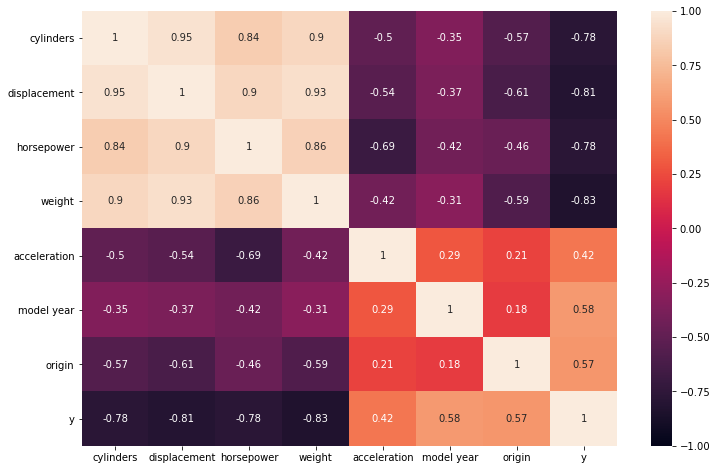

In [20]:
df2 = pd.DataFrame(X).copy()
df2['y'] = y

plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True, vmin=-1,vmax=1)

In [249]:
X.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
5,8,429.0,198,4341,10.0,70,1
6,8,454.0,220,4354,9.0,70,1
7,8,440.0,215,4312,8.5,70,1
8,8,455.0,225,4425,10.0,70,1
9,8,390.0,190,3850,8.5,70,1


In [250]:
np.linalg.cond(X)

5995.63498667632

## Splitting Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model_t = DecisionTreeRegressor()

In [25]:
model_t.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
print('Train score:', model_t.score(X_train, y_train))

Train score: 1.0


In [27]:
print('Test score:', model_t.score(X_test, y_test))

Test score: 0.7746593346457202


In [28]:
val = cross_validate(model_t, X, y, return_train_score=True, cv=10)

In [29]:
val['train_score'].mean()

1.0

In [30]:
val['test_score'].mean()

0.618184682921862

In [31]:
pickle.dump(model_t,open("autompg_dtree_model.pickle","wb"))

## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model_f = RandomForestRegressor(n_estimators=100,random_state=42)

In [34]:
model_f.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [35]:
print('Train score:', model_f.score(X_train, y_train))

Train score: 0.9810185016963988


In [36]:
print('Test score:', model_f.score(X_test, y_test))

Test score: 0.8887277248362457


In [331]:
val = cross_validate(model_f, X, y, return_train_score=True, cv=5)

ValueError: Found input variables with inconsistent numbers of samples: [392, 398]

In [38]:
val['train_score'].mean()

0.9823492688116617

In [39]:
val['test_score'].mean()

0.7690452667051793

In [326]:
val['test_score']

array([ 0.36485028, -0.06535292,  0.59829374,  0.4436591 ,  0.70276513,
        0.6165867 ,  0.47854747,  0.88833381,  0.13703409,  0.04768801])

In [40]:
model_f.predict(X_test)

array([26.337, 22.261, 34.223, 30.065, 26.5  , 28.216, 12.87 , 28.448,
       19.541, 30.843, 14.05 , 20.139, 15.778, 27.333, 19.024, 29.333,
       19.923, 33.071, 28.486, 31.336, 20.786, 39.324, 33.302, 16.289,
       30.982, 24.386, 19.931, 18.542, 27.625, 23.647, 14.705, 20.014,
       20.298, 30.918, 13.66 , 34.254, 13.485, 27.64 , 14.555, 11.76 ,
       14.971, 28.923, 34.298, 26.433, 14.56 , 11.7  , 17.953, 35.624,
       23.3  , 31.089, 14.16 , 23.358, 23.38 , 34.816, 27.805, 16.345,
       18.863, 19.264, 24.17 , 24.101, 11.81 , 19.557, 25.382, 21.86 ,
       26.326, 26.462, 24.906, 31.155, 19.389, 13.68 , 23.63 , 13.215,
       22.386, 27.03 , 24.432, 26.635, 13.74 , 16.792, 26.972])

In [41]:
y_test.ravel()

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. , 15. ,
       19. , 16.9, 29. , 16.2, 28. , 20. , 32.4, 27.4, 35. , 22. , 44. ,
       34.1, 18. , 26. , 26. , 21. , 16. , 26. , 22. , 15. , 19.4, 19.2,
       31.6, 13. , 38. , 14. , 25. , 13. , 10. , 13. , 24. , 36. , 26. ,
       14. , 13. , 19. , 37.3, 21. , 29. , 14. , 24. , 28. , 36. , 22. ,
       16. , 20. , 20. , 25. , 25. , 12. , 22.5, 26.8, 23. , 21.1, 25. ,
       25.1, 29. , 19.9, 15. , 22. , 13. , 22. , 18. , 17.6, 28. , 15. ,
       16. , 27. ])

In [330]:
X_train.describe().round(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,313.00,313.00,313.00,313.00,313.00,313.00,313.00
mean,5.48,195.52,104.59,2986.12,15.54,76.21,1.56
std,1.70,103.77,38.28,841.13,2.82,3.63,0.81
min,3.00,70.00,46.00,1613.00,8.00,70.00,1.00
25%,4.00,105.00,76.00,2234.00,13.50,73.00,1.00
50%,4.00,151.00,95.00,2855.00,15.50,76.00,1.00
75%,8.00,302.00,129.00,3645.00,17.30,79.00,2.00
max,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [329]:
X_test.describe().round(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,79.00,79.00,79.00,79.00,79.00,79.00,79.00
mean,5.43,190.03,103.97,2943.75,15.53,75.08,1.66
std,1.74,108.62,39.55,886.11,2.53,3.78,0.80
min,3.00,68.00,46.00,1800.00,8.50,70.00,1.00
25%,4.00,97.75,75.00,2180.00,14.10,72.00,1.00
50%,4.00,140.00,90.00,2720.00,15.50,74.00,1.00
75%,8.00,261.00,120.00,3452.00,16.70,78.00,2.00
max,8.00,455.00,225.00,4951.00,24.60,82.00,3.00


## KNN Regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
model_k = KNeighborsRegressor(n_neighbors=7)

In [44]:
model_k.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [45]:
print('Train score:', model_k.score(X_train, y_train))

Train score: 0.7868362248211511


In [46]:
print('Test score:', model_k.score(X_test, y_test))

Test score: 0.6729224506904359


In [47]:
val = cross_validate(model_k, X, y, return_train_score=True, cv=10)

In [48]:
val['train_score'].mean()

0.7908160514276561

In [49]:
val['test_score'].mean()

0.4301516787420686

## SVM Regressor

In [50]:
from sklearn.svm import SVR

In [51]:
model_svm = SVR(kernel="linear") # scale yapmak gerekiyor.

In [52]:
model_svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
print('Train score:', model_svm.score(X_train, y_train))

Train score: 0.6249371857994126


In [54]:
print('Test score:', model_svm.score(X_test, y_test))

Test score: 0.5997877664076801


In [55]:
val = cross_validate(model_svm, X, y, return_train_score=True, cv=10)

In [56]:
val['train_score'].mean()

0.591575204480751

In [57]:
val['test_score'].mean()

0.24249544767447956

## "?" olan satıları doldurma

In [194]:
df = pd.read_csv("auto_mpg.csv")

In [195]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [197]:
df["horsepower"] =df["horsepower"].replace("?", np.nan)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [199]:
df["horsepower"] = df["horsepower"].astype(float)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [201]:
df_horsepower = df.groupby(['cylinders'])['horsepower'].mean().rename('horsepower_model_mean').reset_index()

In [202]:
df_horsepower

,cylinders,horsepower_model_mean
0,3,99.250000
1,4,78.281407
2,5,82.333333
3,6,101.506024
4,8,158.300971


In [203]:
df = df.merge(df_horsepower)

In [204]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_model_mean
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,158.300971
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,158.300971
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,158.300971
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,158.300971
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,158.300971
...,...,...,...,...,...,...,...,...,...,...
393,21.5,3,80.0,110.0,2720,13.5,77,3,mazda rx-4,99.250000
394,23.7,3,70.0,100.0,2420,12.5,80,3,mazda rx-7 gs,99.250000
395,20.3,5,131.0,103.0,2830,15.9,78,2,audi 5000,82.333333
396,25.4,5,183.0,77.0,3530,20.1,79,2,mercedes benz 300d,82.333333


In [205]:
df["horsepower"] = df['horsepower'].fillna(df['horsepower_model_mean'])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mpg                    398 non-null    float64
 1   cylinders              398 non-null    int64  
 2   displacement           398 non-null    float64
 3   horsepower             398 non-null    float64
 4   weight                 398 non-null    int64  
 5   acceleration           398 non-null    float64
 6   model year             398 non-null    int64  
 7   origin                 398 non-null    int64  
 8   car name               398 non-null    object 
 9   horsepower_model_mean  398 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 34.2+ KB


In [71]:
df.nunique() # en az olan değere göre sıralamak daha mantıklı. çünkü aynı arabaların farklı silindirli modelleri mevcut olabilir.

mpg                      129
cylinders                  5
displacement              82
horsepower                95
weight                   351
acceleration              95
model year                13
origin                     3
car name                 305
horsepower_model_mean      5
dtype: int64

## cylinders ve origin için kategori oluşturma

In [293]:
df["origin"] = df["origin"].astype(object)

In [294]:
df["cylinders"] = df["cylinders"].astype(object)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mpg                    398 non-null    float64
 1   cylinders              398 non-null    object 
 2   displacement           398 non-null    float64
 3   horsepower             398 non-null    float64
 4   weight                 398 non-null    int64  
 5   acceleration           398 non-null    float64
 6   model year             398 non-null    int64  
 7   origin                 398 non-null    object 
 8   car name               398 non-null    object 
 9   horsepower_model_mean  398 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 34.2+ KB


In [75]:
# X2 = pd.get_dummies(df.drop(["car name", "horsepower_model_mean","mpg"], axis=1)) # drop_first = True olarak da yazılabilir.

In [76]:
# X2

In [77]:
# np.linalg.cond(X2)

In [296]:
X2 = pd.get_dummies(df.drop(["car name", "horsepower_model_mean","mpg"], axis=1), drop_first=True) # drop_first = True olarak da yazılabilir.

In [297]:
X2

,displacement,horsepower,weight,acceleration,model year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,0,0,0,1,0,0
1,350.0,165.0,3693,11.5,70,0,0,0,1,0,0
2,318.0,150.0,3436,11.0,70,0,0,0,1,0,0
3,304.0,150.0,3433,12.0,70,0,0,0,1,0,0
4,302.0,140.0,3449,10.5,70,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,80.0,110.0,2720,13.5,77,0,0,0,0,0,1
394,70.0,100.0,2420,12.5,80,0,0,0,0,0,1
395,131.0,103.0,2830,15.9,78,0,1,0,0,1,0
396,183.0,77.0,3530,20.1,79,0,1,0,0,1,0


In [298]:
np.linalg.cond(X2)

71592.20956952205

In [289]:
np.linalg.cond(np.random.randn(398,10))

1.286825673411159

## Yeni Dataset ile modelleme

In [299]:
y = df["mpg"]

In [300]:
y.head(5)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

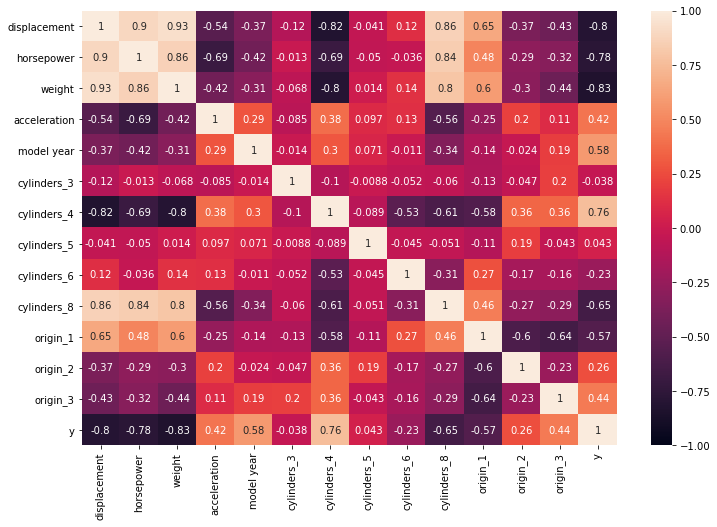

In [261]:
df_c = pd.DataFrame(X2).copy()
df_c['y'] = y

plt.figure(figsize=(12,8))
sns.heatmap(df_c.corr(),annot=True, vmin=-1,vmax=1)

In [301]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

## Random Forest ile tekrar çözüm

In [318]:
model_f2 = RandomForestRegressor(n_estimators=500,random_state=42)

In [319]:
model_f2.fit(X2_train,y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [320]:
print('Train score:', model_f2.score(X2_train, y2_train))

Train score: 0.9853494782964429


In [321]:
print('Test score:', model_f2.score(X2_test, y2_test))

Test score: 0.7970862822174103


In [322]:
val = cross_validate(model_f2, X2, y, return_train_score=True, cv=10)

In [323]:
val['train_score'].mean()

0.9835601548320112

In [324]:
val['test_score'].mean()

0.4212405404240947

In [325]:
val['test_score']

array([ 0.36485028, -0.06535292,  0.59829374,  0.4436591 ,  0.70276513,
        0.6165867 ,  0.47854747,  0.88833381,  0.13703409,  0.04768801])

In [314]:
X2.head(5)

,displacement,horsepower,weight,acceleration,model year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,0,0,0,1,0,0
1,350.0,165.0,3693,11.5,70,0,0,0,1,0,0
2,318.0,150.0,3436,11.0,70,0,0,0,1,0,0
3,304.0,150.0,3433,12.0,70,0,0,0,1,0,0
4,302.0,140.0,3449,10.5,70,0,0,0,1,0,0


In [315]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [316]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_model_mean
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,158.300971
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,158.300971
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,158.300971
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,158.300971
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,158.300971


## sadece origin e göre kategori oluşturma

In [270]:
df["cylinders"] = df["cylinders"].astype(int) # cylinders i tekrar int e çevirdik

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mpg                    398 non-null    float64
 1   cylinders              398 non-null    int32  
 2   displacement           398 non-null    float64
 3   horsepower             398 non-null    float64
 4   weight                 398 non-null    int64  
 5   acceleration           398 non-null    float64
 6   model year             398 non-null    int64  
 7   origin                 398 non-null    object 
 8   car name               398 non-null    object 
 9   horsepower_model_mean  398 non-null    float64
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 32.6+ KB


In [272]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_model_mean
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,158.300971
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,158.300971
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,158.300971
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,158.300971
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,158.300971
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,158.300971
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,158.300971
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,158.300971
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,158.300971
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,158.300971


In [273]:
X3 = pd.get_dummies(df.drop(["car name", "horsepower_model_mean","mpg"], axis=1), drop_first=True) # drop_first = True olarak da yazılabilir.

In [275]:
X3

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0
...,...,...,...,...,...,...,...,...
393,3,80.0,110.0,2720,13.5,77,0,1
394,3,70.0,100.0,2420,12.5,80,0,1
395,5,131.0,103.0,2830,15.9,78,1,0
396,5,183.0,77.0,3530,20.1,79,1,0


In [276]:
y.shape

(398,)

In [277]:
np.linalg.cond(X3)

12515.457985978237

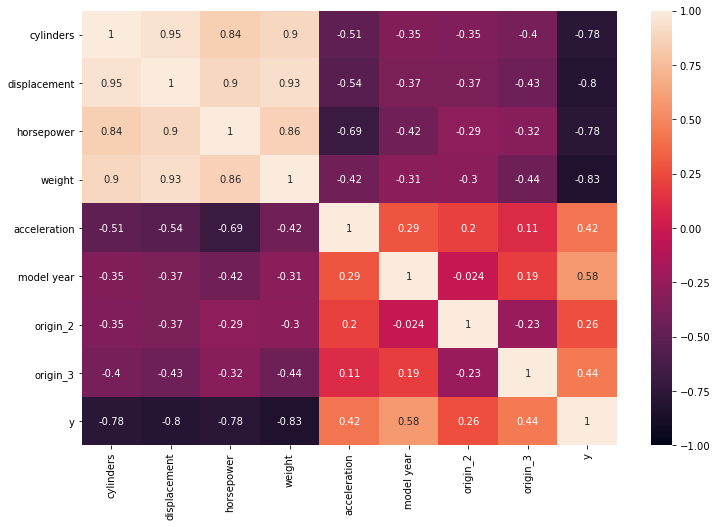

In [238]:
df_o = pd.DataFrame(X3).copy()
df_o['y'] = y

plt.figure(figsize=(12,8))
sns.heatmap(df_o.corr(),annot=True, vmin=-1,vmax=1)

In [278]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

## Random Forest ile tekrar çözüm

In [357]:
model_f3 = RandomForestRegressor(n_estimators=100,random_state=42,oob_score=True)

In [345]:
model_f3.fit(X3_train,y3_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [346]:
print('Train score:', model_f3.score(X3_train, y3_train))

Train score: 0.9834337235186412


In [347]:
print('Test score:', model_f3.score(X3_test, y3_test))

Test score: 0.774914496077801


In [356]:
print(model_f3.oob_score_)

0.8857233572408295


In [348]:
val = cross_validate(model_f3, X3, y, return_train_score=True, cv=10)

In [349]:
val['train_score'].mean()

0.9820315411658942

In [350]:
val['test_score'].mean()

0.388664080655081

In [364]:
t = np.linspace(0,0.035,8)

In [370]:
for i in t:
    model = RandomForestRegressor(random_state=42, ccp_alpha=i, max_depth=7)
    model.fit(X3_train,y3_train)
    val = cross_validate(model, X3, y, return_train_score=True, cv=10)
    print(val['train_score'].mean())
    print(val['test_score'].mean())
    print("")

0.9683490952135715
0.37567740023259466

0.967956220297939
0.3754634613375221

0.967301370160628
0.3760914949010307

0.9666247246964927
0.37613326064222796

0.9658147142992298
0.3768817288613692

0.9649094837996772
0.37563591859606393

0.9638768040196274
0.37423149631940555

0.9627740723731518
0.37253578459309794

